In [ ]:
# 1. 📥 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report

# 2. 🗃️ Load UCI Adult dataset
columns = ["age","workclass","fnlwgt","education","education-num","marital-status",
           "occupation","relationship","race","sex","capital-gain","capital-loss",
           "hours-per-week","native-country","salary"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, names=columns, na_values=" ?", sep=",", skipinitialspace=True)

# 3. 🔍 Clean data: drop rows with missing values
data = data.dropna()

# 4. 🔧 Prepare data
X = data.drop("salary", axis=1)
y = data["salary"].apply(lambda x: 1 if x == ">50K" else 0)

# 5. ⚙️ Define preprocessing pipeline
numeric_features = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_features = X.columns.difference(numeric_features)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# 6. 🧠 Build pipeline with logistic regression
pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, solver="lbfgs"))
])

# 7. 🎯 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. 🔁 Optionally tune C with Grid Search
param_grid = {'clf__C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring="accuracy")
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

# 9. 📊 Evaluate model
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["<=50K", ">50K"])

print("Best C:", grid.best_params_["clf__C"])
print("Accuracy:", accuracy)
print("Mean Squared Error:", mse)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Best C: 0.1
Accuracy: 0.8576692768309535
Mean Squared Error: 0.14233072316904652
Confusion Matrix:
 [[4625  317]
 [ 610  961]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4942
        >50K       0.75      0.61      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



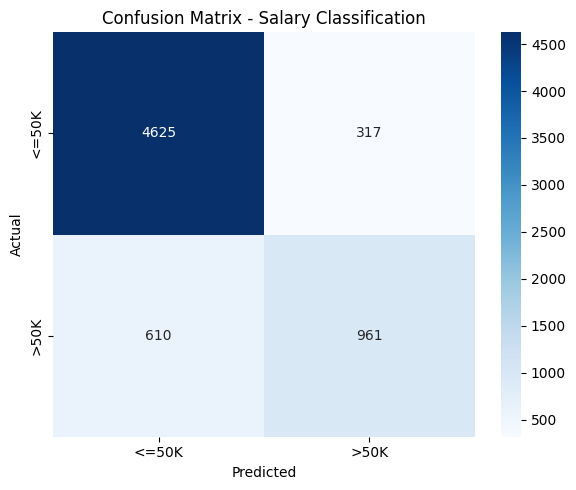

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Salary Classification")
plt.tight_layout()
plt.show()
